In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime
import warnings
warnings.filterwarnings('ignore')

In [39]:
airlines=pd.read_excel("A:/Data Science/assignments/Forecasting/Airlines+Data.xlsx")

In [3]:
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
airlines.isna().sum()

Month         0
Passengers    0
dtype: int64

In [83]:
airlines.shape

(96, 4)

In [6]:
from datetime import datetime,time

In [40]:
airlines.index=pd.to_datetime(airlines.Month)

In [41]:
airlines.head()

,Month,Passengers
Month,,
1995-01-01,1995-01-01,112
1995-02-01,1995-02-01,118
1995-03-01,1995-03-01,132
1995-04-01,1995-04-01,129
1995-05-01,1995-05-01,121


In [20]:
airlines.drop(airlines.columns[0],axis=1,inplace=True)

In [21]:
airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


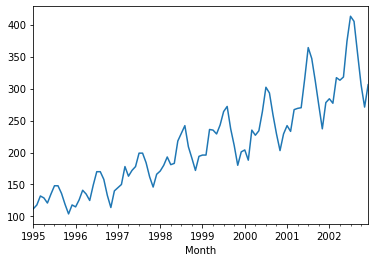

In [22]:
airlines.Passengers.plot()

In [207]:
Pass_diff=airlines.Passengers.diff(periods=1)

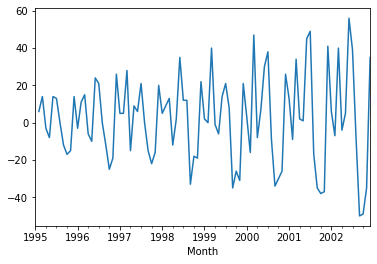

In [208]:
Pass_diff.plot()

In [42]:
airlines['Months']=airlines.index.strftime('%B')
airlines['Year']=airlines.index.strftime('%Y')
airlines['Date']=airlines.index.strftime('%d')

In [45]:
#airlines.drop(airlines.columns[0],axis=1,inplace=True)

airlines.head()

,Passengers,Months,Year,Date
Month,,,,
1995-01-01,112,January,1995,01
1995-02-01,118,February,1995,01
1995-03-01,132,March,1995,01
1995-04-01,129,April,1995,01
1995-05-01,121,May,1995,01


In [48]:
pd.pivot_table(data=airlines,index='Year',values='Passengers',columns='Months',aggfunc=np.mean)

Months,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


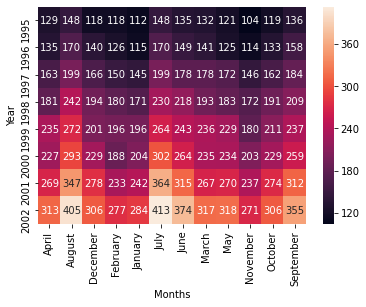

In [56]:
#Heatmap
sns.heatmap(pd.pivot_table(data=airlines,index='Year',values='Passengers',columns='Months',aggfunc=np.mean),annot=True,fmt='d')

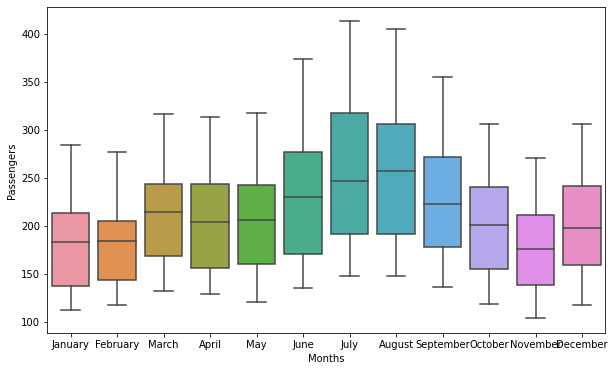

In [63]:
#boxlot
plt.figure(figsize=(10,6))
sns.boxplot(x='Months',y ='Passengers',data=airlines)

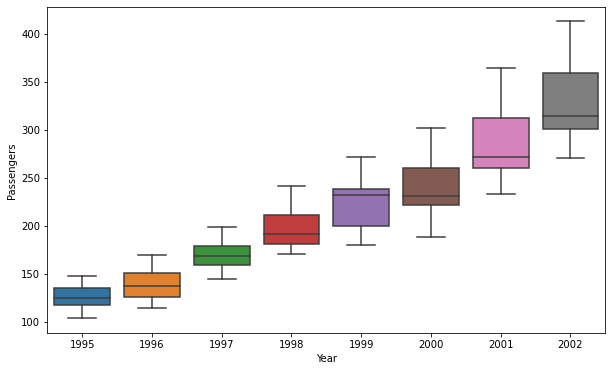

In [62]:
#boxlot
plt.figure(figsize=(10,6))
sns.boxplot(x='Year',y ='Passengers',data=airlines)

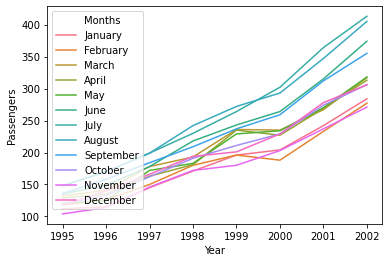

In [65]:
sns.lineplot(x='Year',y='Passengers',hue='Months',data=airlines)

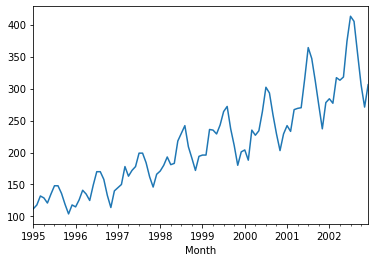

In [69]:
airlines.Passengers.plot()

In [73]:
z=range(2,24,6)
z

range(2, 24, 6)

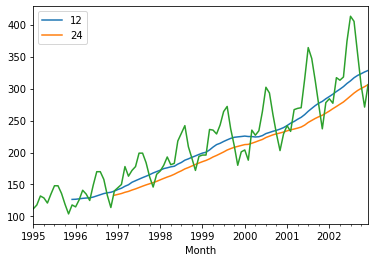

In [116]:
#Moving average to understand the trend
list=[12,24]
for i in list:
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend()
airlines.Passengers.plot()

In [ ]:
#As the dataset has trend and seasonality Moving average is not the method to forecast ,or we should remove trend and seasonality by either differenceing or transformation.

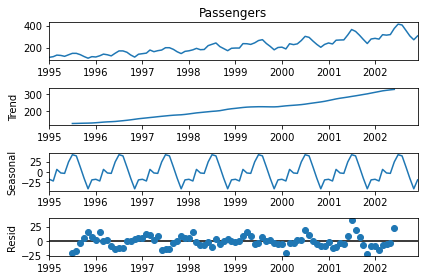

In [122]:
#Time series decompositions plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_add=seasonal_decompose(airlines.Passengers,model='additive')
z=decompose_add.plot()

In [ ]:
#There is a increasing trend as the years go by.Seasonality is visible too,mid of the year there is increase in sales.
#Noise is also following a regurlar patttern

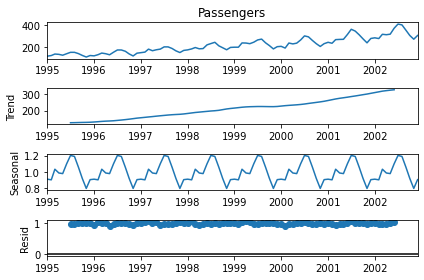

In [121]:
#Multiplicative decompose
seasonal_muti=seasonal_decompose(airlines.Passengers,model='multiplicative')
y=seasonal_muti.plot()

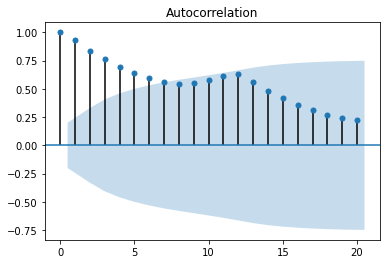

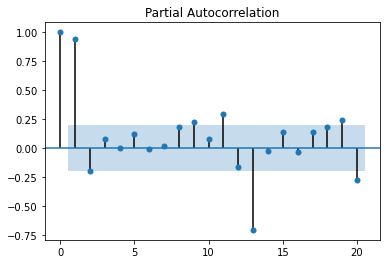

In [350]:
#ACF and PACF plots
import statsmodels.graphics.tsaplots as tsaplots
x=tsaplots.plot_acf(airlines.Passengers,lags=20)#p value is 5 here
x2=tsaplots.plot_pacf(airlines.Passengers,lags=20)#q value 1
#Autocrerelation plots the correlation with past data based on the lag value.

In [138]:
train=airlines.head(80)
test=airlines.tail(16)

In [225]:
train.head()

,Passengers,Months,Year,Date
Month,,,,
1995-01-01,112,January,1995,01
1995-02-01,118,February,1995,01
1995-03-01,132,March,1995,01
1995-04-01,129,April,1995,01
1995-05-01,121,May,1995,01


In [230]:
X=train.iloc[:,0]


(96,)

In [149]:
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [173]:
#Simple Exponnetial method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model=SimpleExpSmoothing(train.Passengers).fit()
ses_predict=ses_model.predict(start=test.index[0],end=test.index[-1])
RMSE_SE=np.sqrt(np.mean((test.Passengers-ses_predict)**2))
#RMSE_SE(57.46)
MAPE_SE=MAPE(ses_predict,test.Passengers)
#MAPE_SE(17.5)

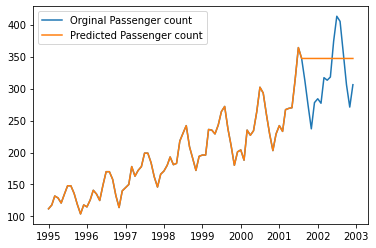

In [231]:
y=X.append(ses_predict)
plt.plot(airlines.Passengers,label='Orginal Passenger count')
plt.plot(y,label='Predicted Passenger count')
plt.legend()

In [174]:
#Holt method
from statsmodels.tsa.holtwinters import Holt
hw_model=Holt(train.Passengers).fit()
hw_model_predict=hw_model.predict(start=test.index[0],end=test.index[-1])
RMSE_Ho=np.sqrt(np.mean((test.Passengers-hw_model_predict)**2))
#RMSE_Ho(72)
MAPE_Ho=MAPE(hw_model_predict,test.Passengers)
#MAPE_Ho(22.17)

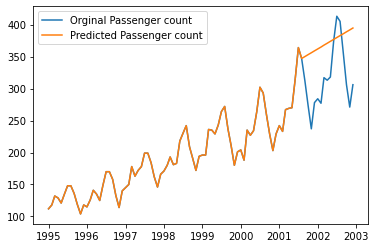

In [232]:
y=X.append(hw_model_predict)
plt.plot(airlines.Passengers,label='Orginal Passenger count')
plt.plot(y,label='Predicted Passenger count')
plt.legend()

In [178]:
#Holt method with additive trend additive seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_add=ExponentialSmoothing(train.Passengers,seasonal='add',trend='add',seasonal_periods=30,damped=True).fit()
hw_add_predict=hw_add.predict(start=test.index[0],end=test.index[-1])
RMSE_HW=np.sqrt(np.mean((test.Passengers-hw_add_predict)**2))
#RMSE_HW(50.64)

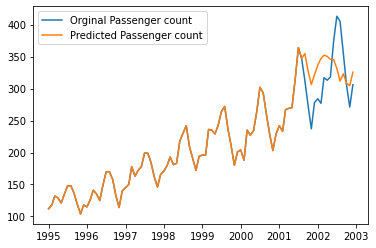

In [233]:
y=X.append(hw_add_predict)
plt.plot(airlines.Passengers,label='Orginal Passenger count')
plt.plot(y,label='Predicted Passenger count')
plt.legend()

In [179]:
#Holt method with additive trend mutiplicative seasonality
holt_multi=ExponentialSmoothing(train.Passengers,trend='add',seasonal='mul',seasonal_periods=30).fit()
holt_multi_pred=holt_multi.predict(start=test.index[0],end=test.index[-1])
RMSE_HO_mu=np.sqrt(np.mean((test.Passengers-holt_multi_pred)**2))
#RMSE_HO_mu(66.75)

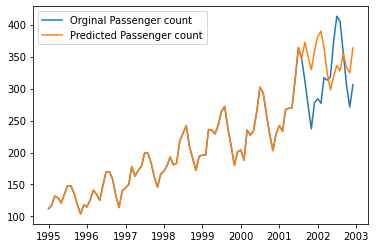

In [234]:
y=X.append(holt_multi_pred)
plt.plot(airlines.Passengers,label='Orginal Passenger count')
plt.plot(y,label='Predicted Passenger count')
plt.legend()

In [251]:
#AR Model
from statsmodels.tsa.ar_model import AR
model_AR=AR(train.Passengers).fit()
model_predAR=model_AR.predict(start=test.index[0],end=test.index[-1])
RMSE_AR=np.sqrt(np.mean((test.Passengers-model_predAR)**2))
RMSE_AR

16.22115409243732

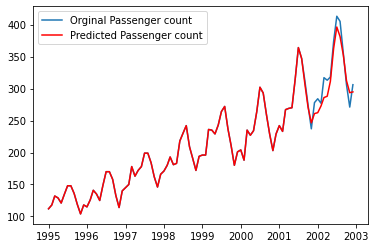

In [389]:
y=X.append(model_predAR)
plt.plot(airlines.Passengers,label='Orginal Passenger count')
plt.plot(y,label='Predicted Passenger count',color='red')
plt.legend()

In [390]:
MAPE(y,test.Passengers)

4.370471243959126

In [254]:
#ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

In [343]:
model_arima=ARIMA(train.Passengers,order=(8,1,1)).fit()
predict_arima=pd.Series(model_arima.forecast(steps=16))[0]
RMSE_ARIMA=np.sqrt(np.mean((test.Passengers-predict_arima)**2))
RMSE_ARIMA


28.243664853306978

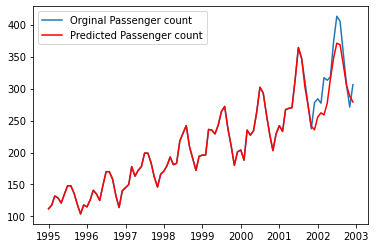

In [344]:
x=pd.Series(predict_arima,index=test.index)
y=X.append(x)
plt.plot(airlines.Passengers,label='Orginal Passenger count')
plt.plot(y,label='Predicted Passenger count',color='red')
plt.legend()

In [351]:
MAPE(predict_arima,test.Passengers)

7.0618852863049275

In [385]:
#SARIMA model
import statsmodels.api as sm
model_sm=sm.tsa.statespace.SARIMAX(train.Passengers,order=(8,1,1),seasonal_order=(1,1,1,12)).fit()
forecast=model_sm.predict(start=test.index[0],end=test.index[-1],dynamic=True)

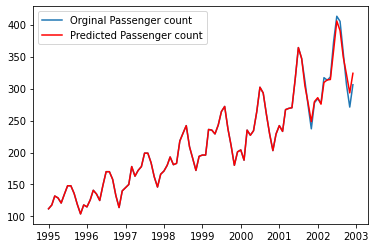

In [386]:
x=pd.Series(forecast,index=test.index)
y1=X.append(x)
plt.plot(airlines.Passengers,label='Orginal Passenger count')
plt.plot(y1,label='Predicted Passenger count',color='red')
plt.legend()

In [388]:
MAPE(x,test.Passengers)

2.7655527028658082

In [ ]:
#SARIMAX has build the best model compared to other models.